# K-Nearest Neighbors

In K-NN applied to classification, the algorithm outputs a class membership. More precisely, an object/data point is being assigned to that class which is most common among its K nearest neighbors. K is typically a positive and small integer. For example, if K = 1, then the object/data point is just assigned to the category of that single nearest neighbor. For more details, we refer to https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm and https://towardsdatascience.com/k-nearest-neighbor-python-2fccc47d2a55.

In [163]:
#import necessary packages
import pandas as pd

import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

%matplotlib inline
import matplotlib.pyplot as plt

from helper import plot_classifier #helper.py is saved in the repository

## Case 1: Simple classification via KNN
In the following we present an analysis of a data set with success/failure information via the KNN algorithm.

In [164]:
#define data frame
df = pd.read_csv("classification.csv")

df.head()

,age,interest,success
0,23.657801,18.859917,0.0
1,22.573729,17.969223,0.0
2,32.553424,29.463651,0.0
3,6.718035,25.704665,1.0
4,14.401919,16.770856,0.0


In [165]:
#define variables
X = df[["age","interest"]].values

Y = df["success"].values # single brackets

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 0, test_size = .25)

#rescale training and test data
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [166]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors = 15) #standard is n_neighbors = 5
model.fit(X_train, Y_train)

Y_predicted = model.predict(X_test)

print(model.score(X_test, Y_test))

0.9466666666666667


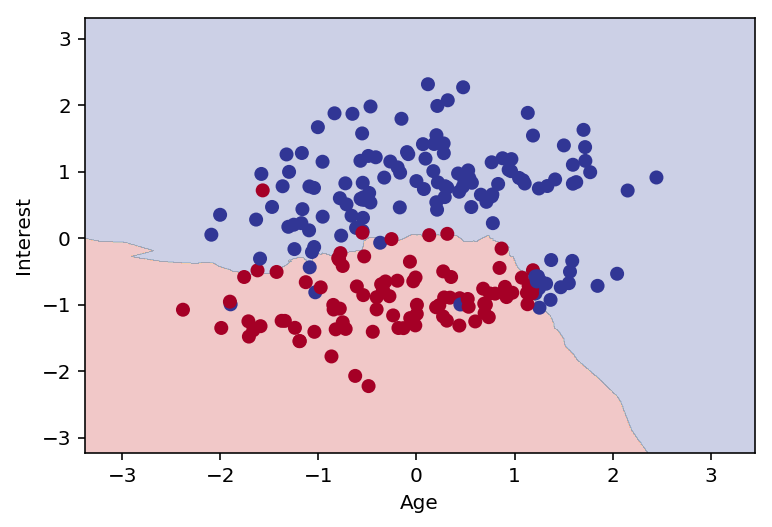

In [167]:
#plotting for the training data
plot_classifier(model, X_train, Y_train, proba = False, xlabel = "Age", ylabel = "Interest")

Comment: We observe that for "n_neighbors" larger and larger our results become more and more unreliable.

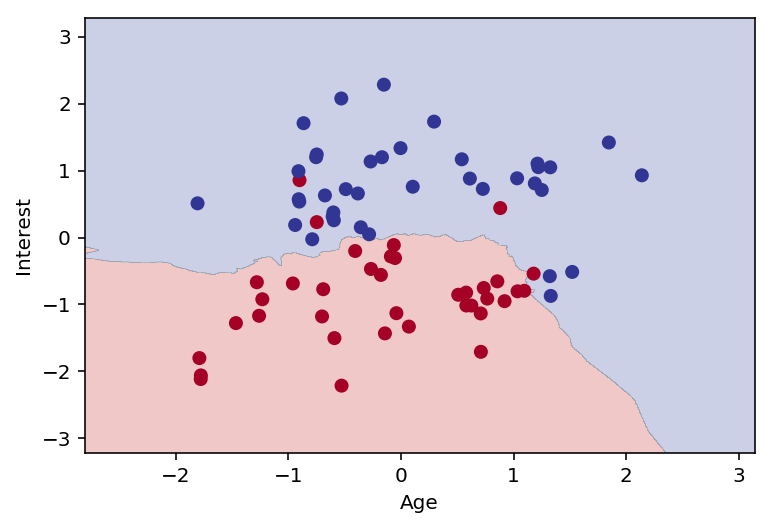

In [168]:
#plotting for the test data
plot_classifier(model, X_test, Y_test, proba = False, xlabel = "Age", ylabel = "Interest")

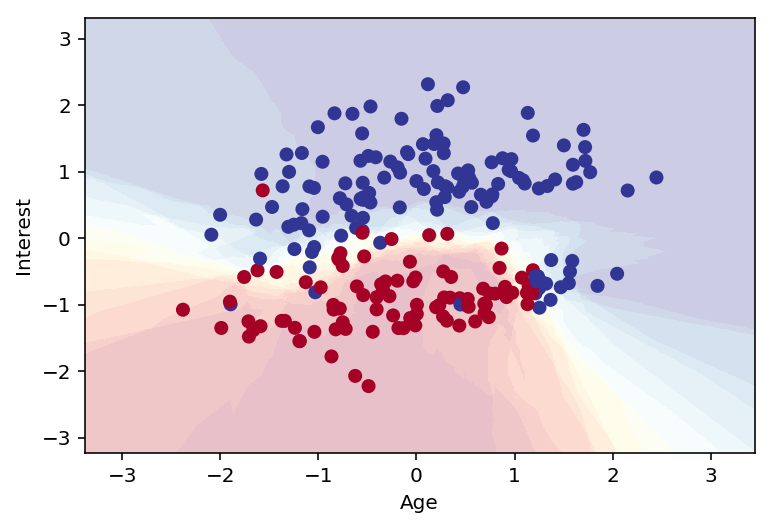

In [169]:
#plotting for the training data and visualizing transition regions
plot_classifier(model, X_train, Y_train, proba = True, xlabel = "Age", ylabel = "Interest")

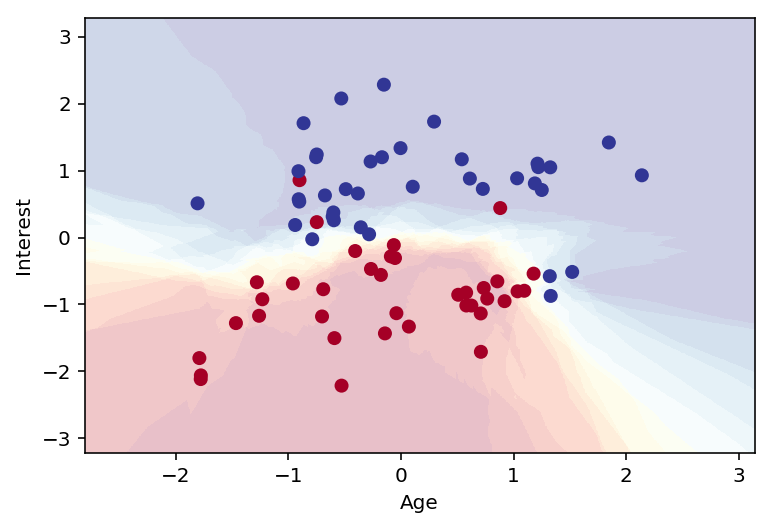

In [170]:
#plotting for the test data and visualizing transition regions
plot_classifier(model, X_test, Y_test, proba = True, xlabel = "Age", ylabel = "Interest")

## Case 2: IRIS dataset

In this data set information regarding the blossom size of different types if iris flowers are saved. Learning a model will allow us to categorize any further unknown data. In the following we will compare the KNN algorithm to the multinomial logistic regression.

In [171]:
#define data frame
df = pd.read_csv("iris.csv")

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [172]:
df.shape

(150, 6)

In [173]:
#define variables
X = df[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]].values

Y = df["Species"].values # single brackets

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 0, test_size = .25)

#rescale training and test data
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [174]:
#classification via KNN
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors = 5) #standard is n_neighbors = 5
model.fit(X_train, Y_train)

Y_predicted = model.predict(X_test)

print(model.score(X_test, Y_test))

0.9736842105263158


In [175]:
#multinomial logistic regression
model = LogisticRegression(multi_class = "multinomial", solver = "newton-cg") # solver = "saga", max_iter = 400

model.fit(X_train, Y_train)

Y_predicted = model.predict(X_test)

print(model.score(X_test, Y_test))

0.9736842105263158


Comment: For the given case the results seem to agree. If the number K of nearest neighbors is increased the results start to differ. Standard logistic regression as for one - vs - all classification leads to results of lesser quality.